### Import Necessary Modules

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


### Creating Linearly seperable data

shape of the x: (200, 2)
shape of the y: (200,)


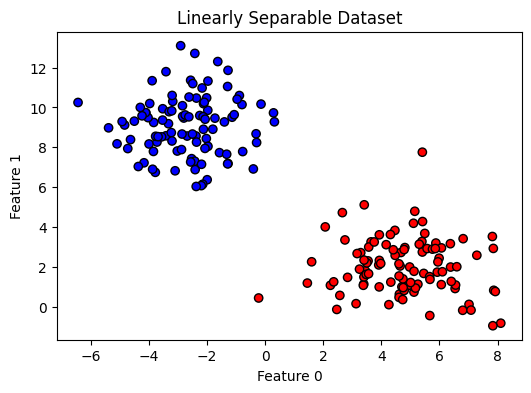

In [47]:
# Create a synthetic(fake) 2-class(cluster) and 2-feature dataset
X, y = make_blobs(centers=2, random_state=42, n_samples=200, cluster_std=1.5)
print(f"shape of the x: {X.shape}")
print(f"shape of the y: {y.shape}")

# Plot the dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Linearly Separable Dataset")
plt.show()


### Train a Linear SVM

In [49]:
# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM with linear kernel and high C 
svm = SVC(kernel='linear', C=100000)
svm.fit(X_train, y_train)

# Predict labels for test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Accuracy: 1.000

Confusion Matrix:
[[23  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



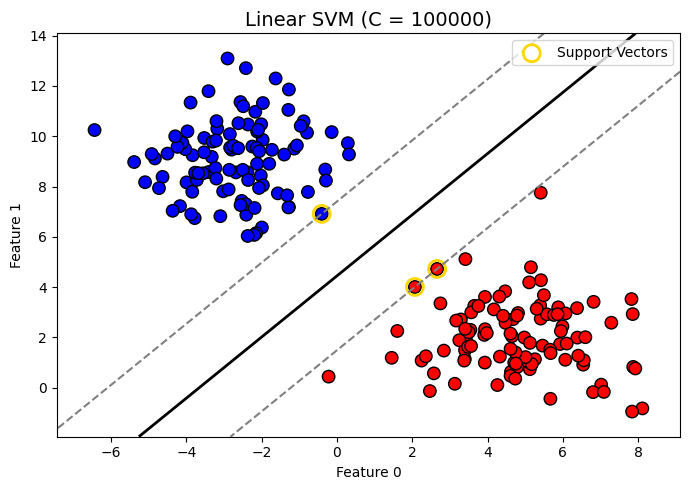

In [50]:
# Create mesh for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Compute decision function
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the synthetic data
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=80, edgecolor='k')

# Decision boundary & margins
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # boundary
plt.contour(xx, yy, Z, levels=[-1, 1], colors='gray', linestyles='--', linewidths=1.5)  # margins

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='gold', linewidth=2, label="Support Vectors")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title(f"Linear SVM (C = 100000)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### Effect of the Regularizatio Parameter

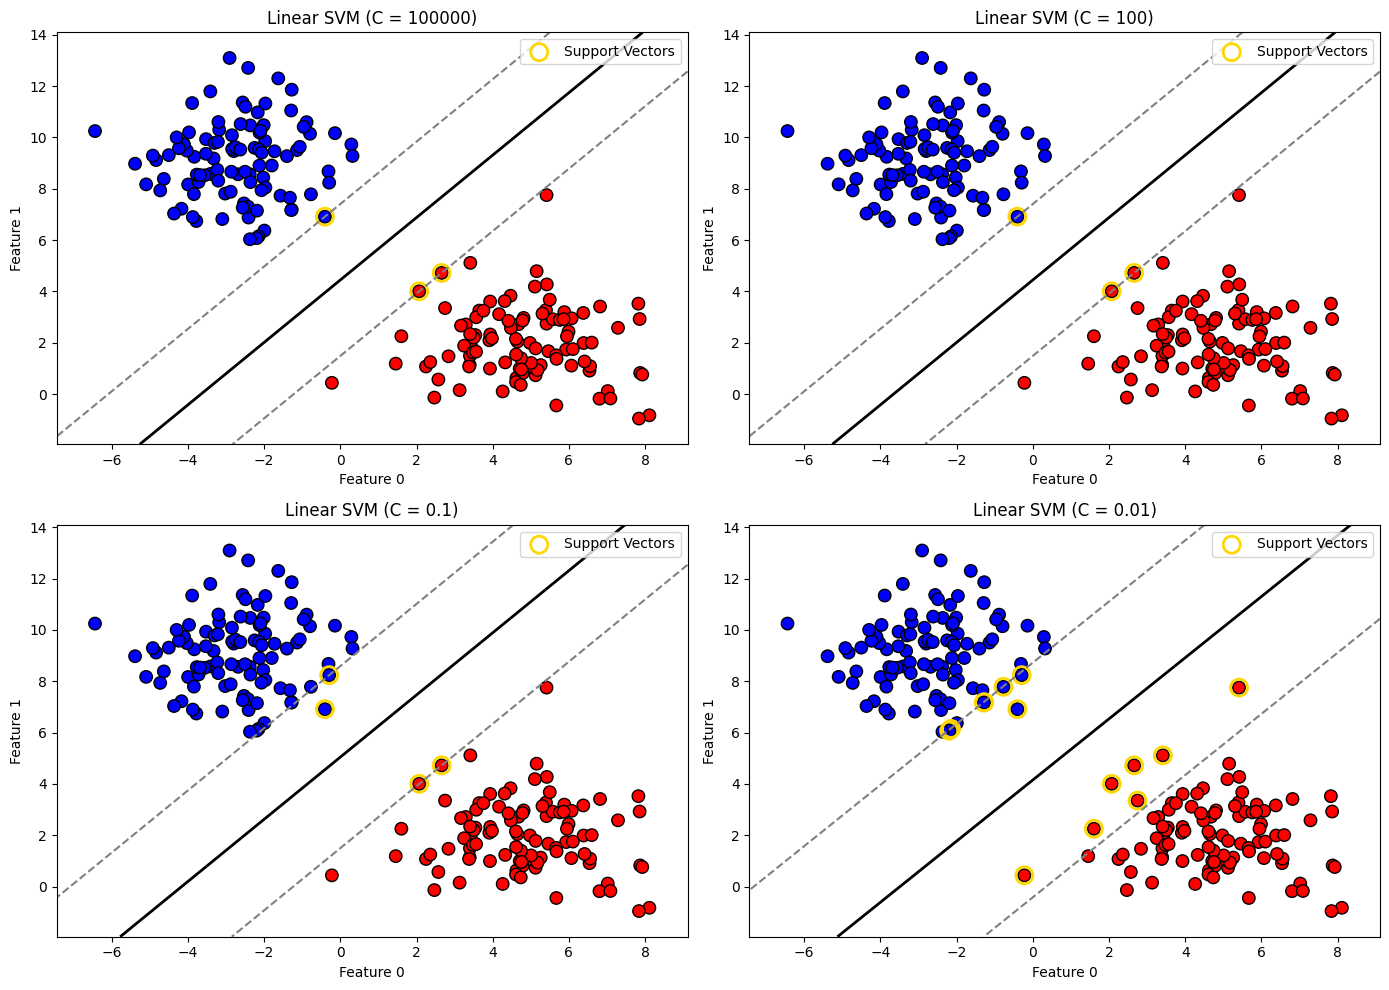

In [51]:
# Regularization Prarameter List
C_values = [100000, 100, 0.1, 0.01]

# Create mesh for decision boundaries 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Plot for each C value
plt.figure(figsize=(14, 10))

for i, C in enumerate(C_values, 1):
    # Train SVM
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Compute decision function
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Subplot
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=80, edgecolor='k')

    # Decision boundary
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    # Margins
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='gray', linestyles='--', linewidths=1.5)

    # Support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='gold', linewidth=2, label="Support Vectors")

    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title(f"Linear SVM (C = {C})", fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()


### Creating Non-linearly separable data

shape of the x: (200, 2)
shape of the y: (200,)


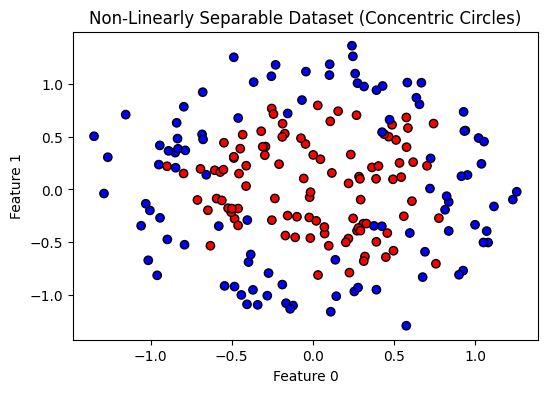

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate concentric circles dataset (non-linearly separable)
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)   

print(f"shape of the x: {X.shape}")
print(f"shape of the y: {y.shape}")

# Plotting the dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')   

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Non-Linearly Separable Dataset (Concentric Circles)")
plt.show()


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM with RBF kernel 
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)

# Predictions on test data
y_pred = svm.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Accuracy: 0.800

Confusion Matrix:
[[17  5]
 [ 3 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.75      0.83      0.79        18

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



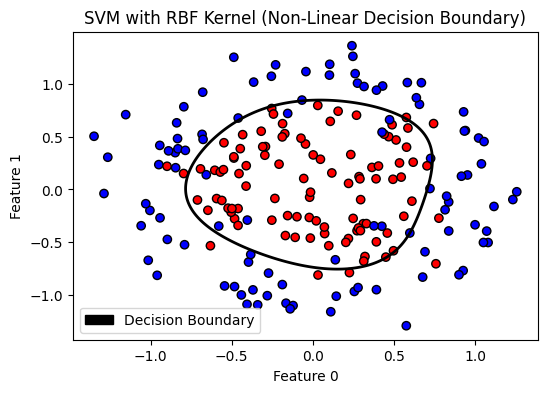

In [61]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 4))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k', label="Data points")

# Create grid for decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 500)
yy = np.linspace(ylim[0], ylim[1], 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary
contour = plt.contour(XX, YY, Z, levels=[0], linewidths=2, colors='k')

# Create legend entry for decision boundary
decision_boundary_patch = mpatches.Patch(color='black', label='Decision Boundary')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("SVM with RBF Kernel (Non-Linear Decision Boundary)")

plt.legend(handles=[decision_boundary_patch])
plt.show()


### Effect of regularization parameters

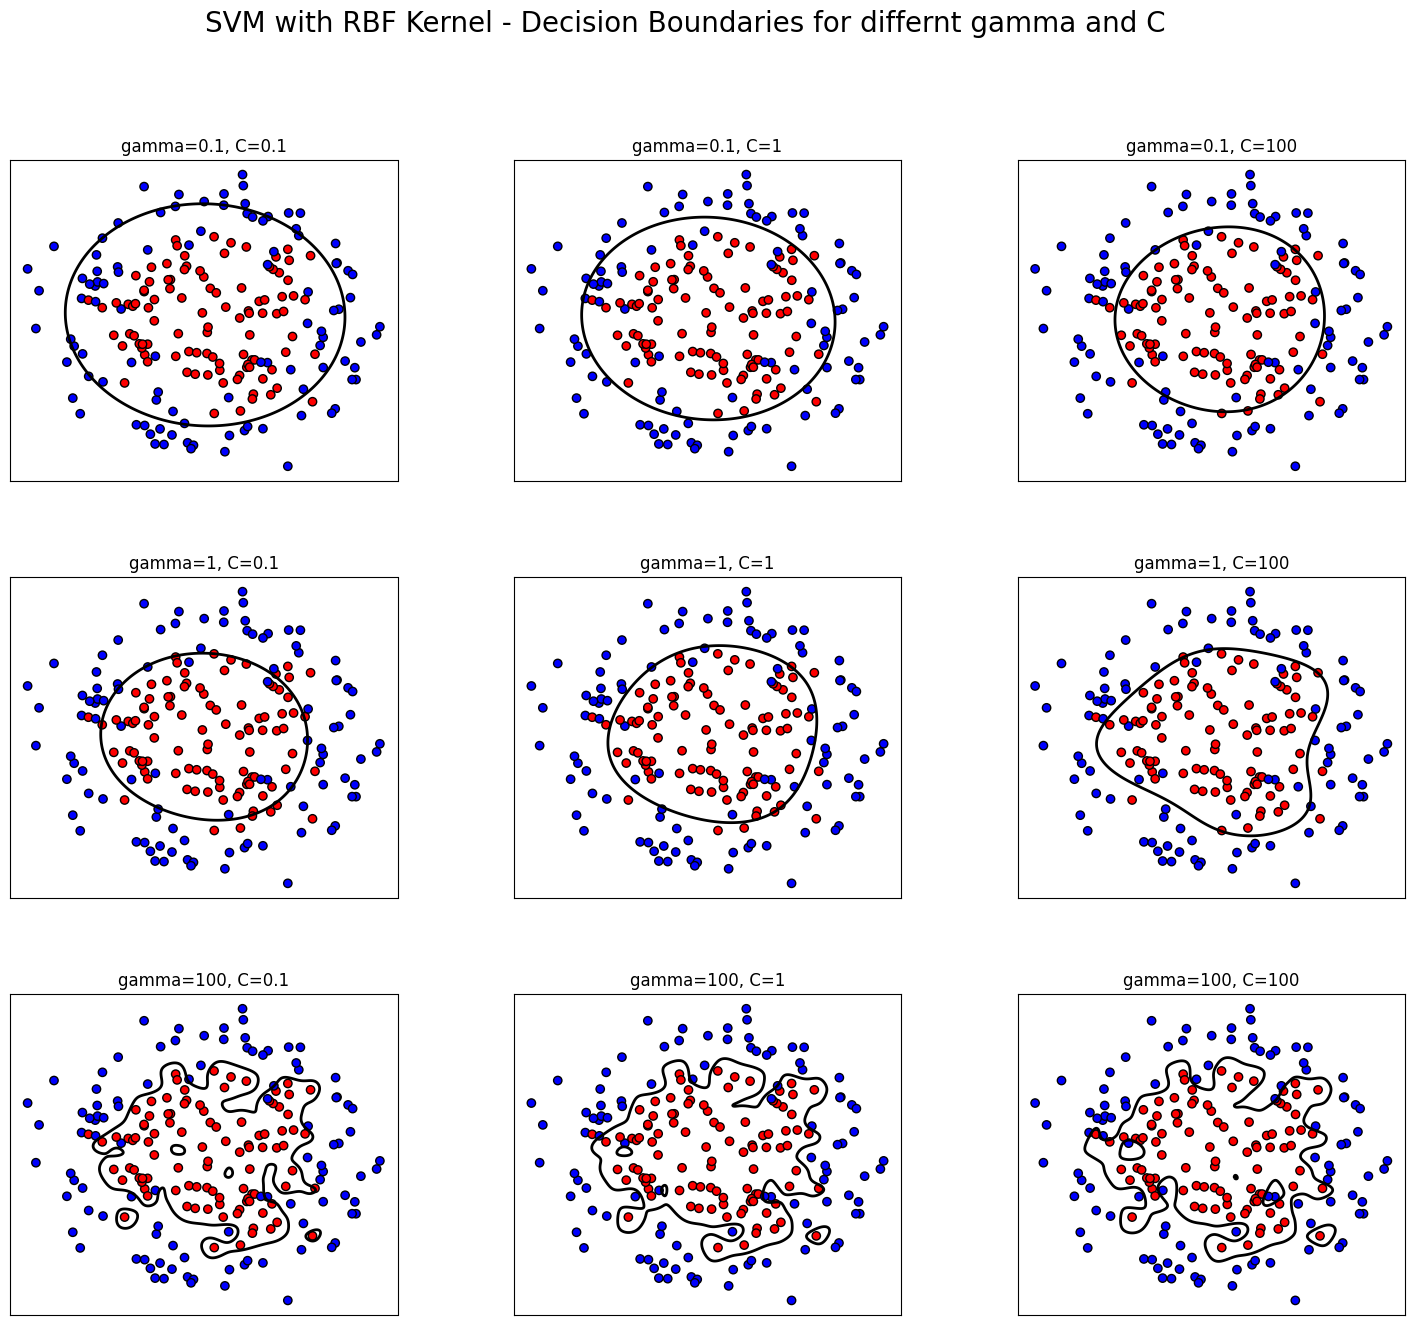

In [73]:
# Parameter grid
gamma_values = [0.1, 1, 100]
C_values = [0.1, 1, 100]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, gamma in enumerate(gamma_values):
    for j, C_val in enumerate(C_values):
        ax = axes[i, j]
        
        # Train SVM with given parameters
        svm = SVC(kernel='rbf', C=C_val, gamma=gamma)
        svm.fit(X, y)
        
        # Plot data points
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
        
        # Create grid for decision function using current axis limits
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 500)
        yy = np.linspace(ylim[0], ylim[1], 500)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        
        # Compute decision function
        Z = svm.decision_function(xy).reshape(XX.shape)
        
        # Plot decision boundary
        contour = ax.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
        
        # Set title and remove ticks for clarity
        ax.set_title(f"gamma={gamma}, C={C_val}", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

fig.suptitle("SVM with RBF Kernel - Decision Boundaries for differnt gamma and C", fontsize=20)
plt.show()


### Confusion matrix

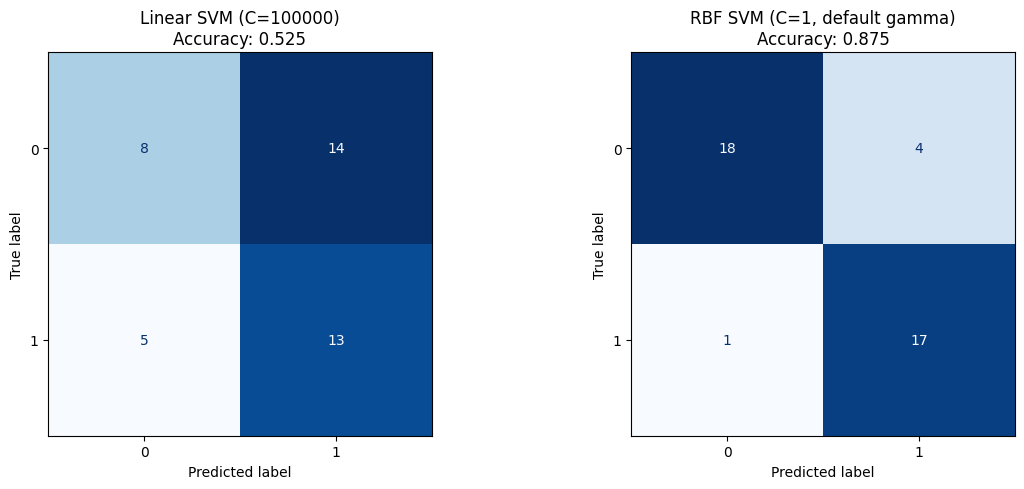

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.36      0.46        22
           1       0.48      0.72      0.58        18

    accuracy                           0.53        40
   macro avg       0.55      0.54      0.52        40
weighted avg       0.56      0.53      0.51        40

RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.81      0.94      0.87        18

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear SVM
svm_linear = SVC(kernel='linear', C=100000)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train RBF SVM (default gamma)
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy scores
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear kernel confusion matrix
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp_linear.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f"Linear SVM (C=100000)\nAccuracy: {acc_linear:.3f}")

# RBF kernel confusion matrix
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title(f"RBF SVM (C=1, default gamma)\nAccuracy: {acc_rbf:.3f}")

plt.tight_layout()
plt.show()

# Optionally print classification reports
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))
